# Finding Heavy Traffic Indicators on I-94

The project is devoted to examiane traffic on I-94 Interstate highway which connecting the Great Lakes and northern Great Plains regions of the United States. 

The goal of analysis is to find some indicators of heavy traffic on I-94. If they are, we'll try to find a correlation and check if they have influnce on traffic increase. We will focus on the strecht of road between Minneapolis and Saint Paul, because the station which records traffic is located approximately midway between there and records cars moving from east to west.

## Dataset

Dataset is made by John Hogue and is available [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

## Exploring dataset

In [1]:
import pandas as pd

#oppenig dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#show first and last 5 rows
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
#display info for each column
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Dataset contains over 48,200 rows and has 9 columns which 5 are numeric. There are no null values.

## Exploring traffic volume column

In [3]:
#import matplotlib
import matplotlib.pyplot as plt
#add this row to enables Jupyter to generate the graphs
%matplotlib inline

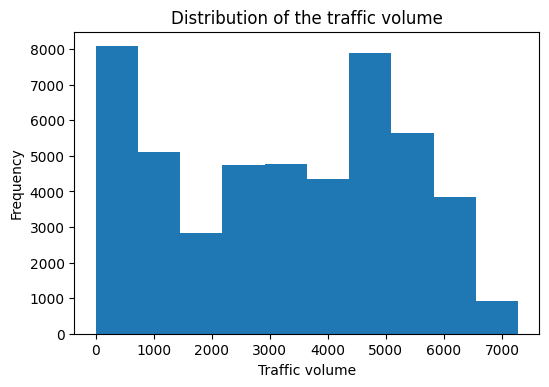

In [4]:
#creating histogram of traffic volume
traffic['traffic_volume'].plot.hist()
plt.title('Distribution of the traffic volume')
plt.xlabel('Traffic volume')
plt.show()

In [5]:
#look up few statisics about traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In period between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, we can spot that most values of hourly traffic are less than 5,000 cars. The average is 3260 and most frequency are traffic volume less than 1,000 cars (which occurs 8,000 times) and 5,000 volume, occurs almost the same. Max traffic volume is 7280, but it is least often.

We can see irregular frequency of traffic volume, which prompts us to examiane day and night traffic diffrence.

## Comparing day and night traffic volume

We'll start by dividing the dataset into two parts:

 * Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
 * Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
 
Let's convert *date time* **column** to datetime format.

In [6]:
#convering date time column to datetime format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [8]:
#isolating traffic volume during the day
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print('Day traffic volume shape: ',day.shape)

#isolating traffic volume during the night
night = traffic.copy()[~((traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19))]
print('Night traffic volume shape: ',night.shape)

Day traffic volume shape:  (23877, 9)
Night traffic volume shape:  (24327, 9)


Shape of day and night dataframe differs slighty. There are some more values in night traffic. The reason is some missing hours and pandas treats it as 00:00 hour automatically.

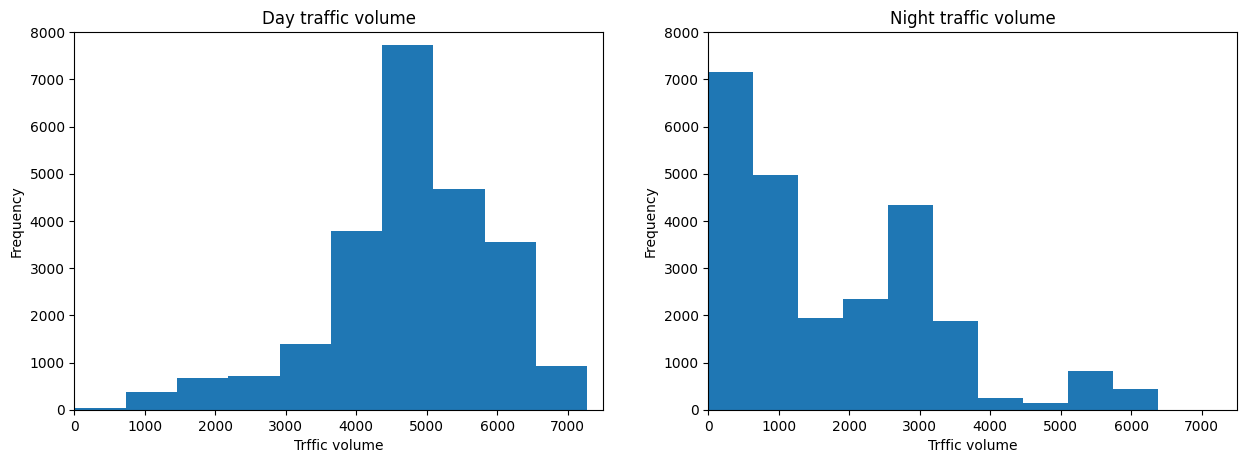

In [9]:
#setting compare of 2 histograms side-by-side
plt.figure(figsize=(15,5))

#day hist
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Day traffic volume')
plt.xlabel('Trffic volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])

#night hist
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Night traffic volume')
plt.xlabel('Trffic volume')
plt.ylabel('Frequency')
plt.xlim([0,7500])
plt.ylim([0,8000])

plt.show()

In [10]:
#look up few statisics about day traffic_volume column
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
#look up few statisics about night traffic_volume column
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Shape of **Day traffic volume** histogram looks similar to normal distribution, but most values are on right side. The most frequency of cars per hour is in range between 3,700 and 6,500. The average is 4763 cars. It means that during the day traffic is high and most of time (75%) there are 4252 cars per hour or more.

As far far as shape of **Night traffic volume** is concerned, is a typical right skwed histogram. It indicates that most are low. We can spot that in 75% of total night time there are less than 2819 cars per hour.

We can conclude that traffic during the night time is much lighter than during the day. Our aim is to find indicators of heavy traffic, so we will focus on day traffic volume.

## Finding time indicators 

**Traffic volume in each day of week**

We know that higher traffic is during the day. Let's compare each day of the week with traffic volume.

In [12]:
#generating Series with an average cars per hour in each day of week 
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

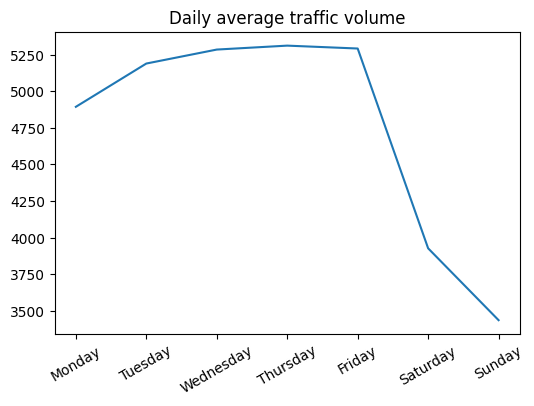

In [13]:
#generating line plot with daily traffic volume average
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.title('Daily average traffic volume')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           rotation=30)
plt.show()

We may noticed that during bussines days, the average of traffic volume is more than 4,750 cars per hour. We can spot huge decrease in the weekend. On Saturady the average volume is under 4,000, on Sunday less than 3,500. 

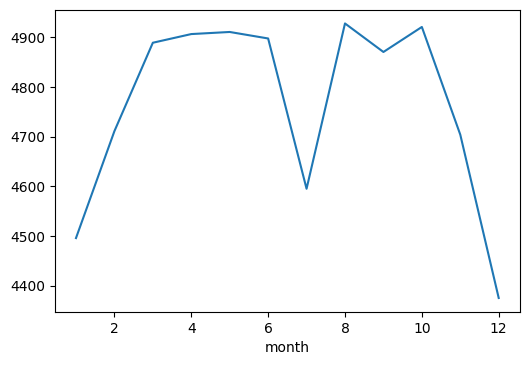

In [14]:
#generating plot with monthly traffic volume
day['month'] = day['date_time'].dt.month
per_month = day.groupby('month').mean()
per_month['traffic_volume'].plot.line()
plt.show()

The fraffic is heavier from March till June and from August till October. We can spot huge decrease during July. The less trrafic is also during winter, from October till March.

**Traffic in hour of day**




In [15]:
#Split dataset on each hour on bussines day and weekend
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print('Bussines day')
print(by_hour_business['traffic_volume'])
print('\n')
print('Weekend')
print(by_hour_weekend['traffic_volume'])

Bussines day
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Weekend
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


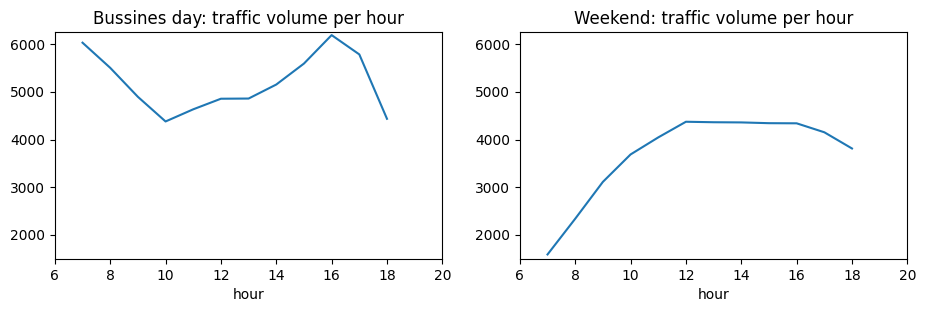

In [16]:
#generating gird chart
plt.figure(figsize=(11,3))

#bussines day chart
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Bussines day: traffic volume per hour')
plt.ylim([1500,6250])
plt.xlim(6,20)


plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend: traffic volume per hour')
plt.ylim([1500,6250])
plt.xlim(6,20)

plt.show()


More cars per hour on average are during bussines day. We can spot two max volumes: first at 7 a.m (more than 6,000 cars per hour) when people are going to work. Then, the line goes down and after 10 am traffic volme increases again. Next max volume is at 4 pm when people back to home. During the bussines day, traffic volume never falls under 4,000.

On weekends, in the moring till 8 am there are not many cars on road (lees than 2,000). We can spot growth form the moring till 12 am. Then the line is horizontal and traffic volume is around 4,500 cars per hour. After 4 pm there is a little decrease.

To sum up:

* Traffic volume is heavier on bussines day then at weekends,
* On business days, the rush hours are around 7 and 16.,
* Either bussines days nor weekends, form 10 till 14 traffic volume is on the simillar level.

In [17]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Finding weather indicators

We know days, months and hours when traffic is heavier. Let's look for weather indicators. First, we will check correlation between traffic volume and others numeric columns.

In [18]:
#chcecking correlation
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
dayofweek        -0.416453
month            -0.022337
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that **temp** column has the biggest, postive correlation.

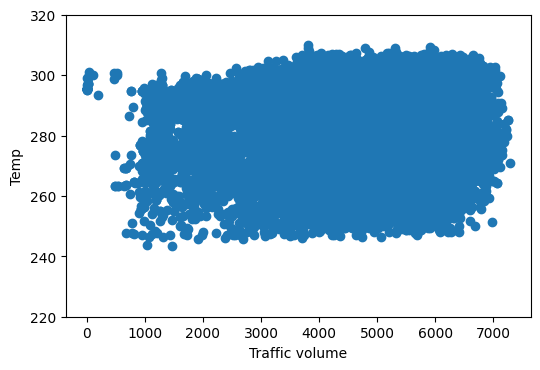

In [19]:
#creating scatter plot 
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic volume')
plt.ylabel('Temp')
plt.ylim(220,320) #2 points drop
plt.show()

Temp indicator dosn't have big influnce on traffic volume.

Let's check others indicators.

In [20]:
#groupping dataframe
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

In [21]:
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dayofweek,month,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,3.138928,6.490599,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,3.005631,6.393243,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,2.934315,7.105323,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,2.798343,6.646409,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,2.754197,5.832134,12.467626
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,2.895102,6.734285,11.078288
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,2.914467,6.774023,12.642379
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,2.416667,6.833333,13.166667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,2.750344,6.374828,12.153370


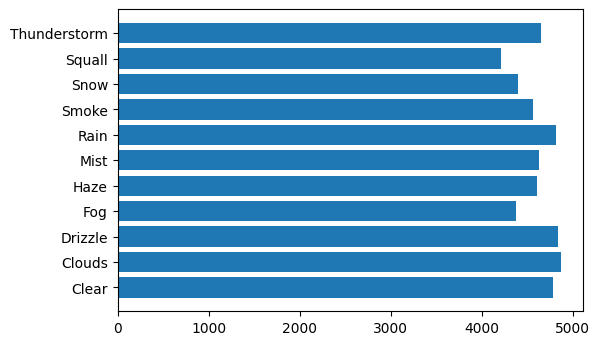

In [22]:
#creating horizontal bar plot
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.show()

Weather type dosn't have big influnce on traffic volume. Differences are slight, the least traffic is during Squall and Fog.

We'll check others wheather indicators.

In [23]:
#check first 5 forws with weather description 
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dayofweek,month,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,2.000000,7.000000,14.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,2.895540,7.557512,12.453052
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,2.998210,6.675260,12.811314
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,3.028777,7.244604,11.697842
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,2.977253,6.159230,12.633421


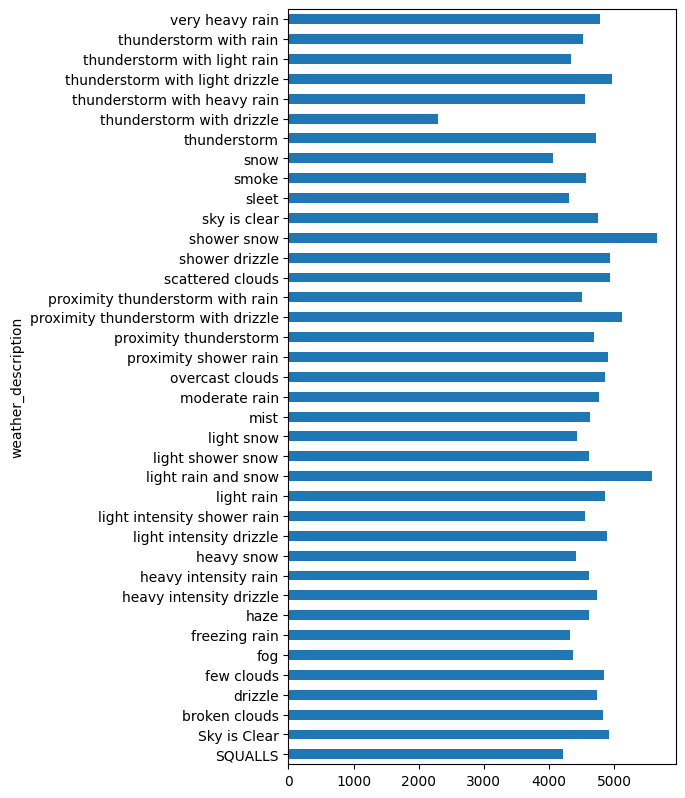

In [24]:
#creating horizontal bar with weather_description
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

plt.show()

Most weather indicators dosn't have influnce on traffic volume again and they are usually in range between 4,000 and 5,000 cars per hour. We can spot that during thunderstorm with drizzle, traffic volume descrease to almost 2,000 cars per hour.

Interestingly, when the light rain and snow or shower snow is, traffic volume exceeding 5,000. It seems that pepole choose car insted of bike or walking on feet.

## Conclusion

In this project we was finding indicators, which can contribute on heavier traffic on I-94 Interstate highway. After our analysis we concluded:

- Traffic volume is heavier on bussines day then at weekends,
- On business days, the rush hours are around 7 and 16.,
- Either bussines days nor weekends, form 10 till 14 traffic volume is on the simillar level,
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February),
- Weather doesn't have big inluence on traffic volume, but we spot:
    - During thunderstrom the traffic volume decrease rapidly,
    - Light snow and rain increase traffic volume.